Name: **Serrano, Jio A.**<br>
Course and Section: **CPE 019 - CPE32S3** <br>
Date of Submission: **February 7, 2024**<br>
Instructor: **Engr. Roman Richard** <br>

### Part 1: The Dataset

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology
students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects. Information about gender and body size (height and weight) are also included. The researchers withheld the weights of two subjects and the height of one subject for reasons of confidentiality. Two simple
modifications were applied to the dataset:

1. Replace the quesion marks used to represent the withheld data points described above by the
'NaN' string. The substitution was done because Pandas does not handle the question marks
correctly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.
The prepared dataset is saved as brainsize.txt.

#### Step 1: Loading the Dataset From a File

Before the dataset can be used, it must be loaded onto memory.

In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to the module.

The second line loads the dataset CSV file into a variable called brainFile.

The third line uses`read_csv()`, a pandas method, to convert the CSV dataset stored in brainFile into a dataframe. The dataframe is then stored in the brainFrame variable.

Run the cell below to execute the described functions.


In [ ]:
# Code cell 1
import pandas as pd
brainFile = 'brainsize.txt'
brainFrame = pd.read_csv(brainFile, sep="\t")

**Remarks**: In the `pd.read_csv()` function, an additional parameter was used, `sep="\t"`. This parameter tells the function that the data inside the text file are separated by a tab instead of the usual comma to avoid encountering problems later on.

#### Step 2: Verifying the dataframe.

To make sure the dataframe has been correctly loaded and created, use the `head()` method. Another Pandas method, `head()` displays the first five entries of a dataframe.

In [ ]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


**Remarks**: The displayed values, upon checking the text file, matched with the first five values in the data set.

### Part 2: Scatterplot Graphs and Correlatable Variables

### Step 1: The pandas `describe()` method.

The pandas module includes the `describe()` method which performs same common calculations
against a given dataset. In addition to provide common results including count, mean, standard
deviation, minimum, and maximum, `describe()` is also a great way to quickly test the validity of the values in the dataframe.

Run the cell below to output the results computed by `describe()` against the brainFrame dataframe.

In [ ]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables. Other more robust correlation methods exist but are out of the scope of this lab.

##### a. Load the required modules.
Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.

In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

##### b. Separate the data.
To ensure the results do not get skewed because of the differences in male and female bodies, the
dateframe is split into two dataframes: one containing all male entries and another with only female instances.

Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the respective entries.

In [ ]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]


##### c. Plot the graphs.
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line below uses Pandas `mean()` method to calculate the mean value between the three and store the result in the `menMeanSmarts` variable. Notice that the first line also refers to the menDf, the filtered dataframe containing only male entries.

The second line uses the `matplotlib` method `scatter()` to create a scatterplot graph between the `menMeanSmarts` variable and the `MRI_Count` attribute. The MRI_Count in this dataset can be thought as of a measure of the physical size of the subjects' brains.

The third line simply displays the graph.

The fourth line is used to ensure the graph will be displayed in this notebook.

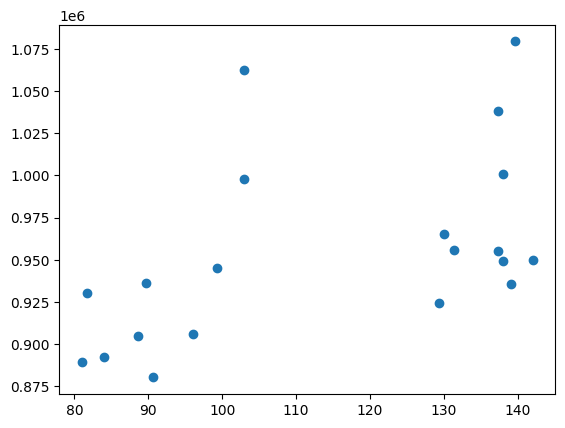

In [ ]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

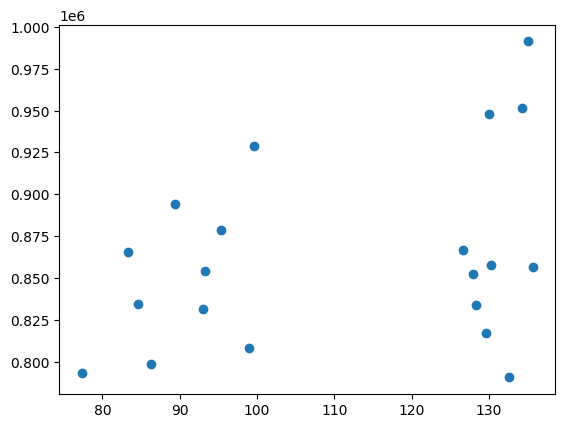

In [ ]:
# Code cell 7
# Graph the women-only filtered dataframe

womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

**Remarks**: Scatterplots are used to visualize the relationship of two numeric values [1]. In the above example, we can see that the scatterplot presented in the women's chart contains information about their mean values of their IQs and their MRI count.

#### Part 3: Calculating Correlation with Python


##### Step 1: Calculate correlation against brainFrame.

The pandas `corr()` method provides an easy way to calculate correlation against a dataframe. By simply calling the method against a dataframe, one can get the correlation between all variables at the same time.


In [ ]:
# Code cell 8
brainFrame.corr(method='pearson')


<ipython-input-10-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


*Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled with 1s? Is that a coincidence? Explain.*

No, it is not a coincidence. The diagonal represents the correlation of an attribute with itself, and if we consult the formula of the Pearson correlation, when the two attributes have the same values, the result is always 1, which indicates a perfect correlation.

*Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.*

No, it is not a coincidence. Again, we may refer back to the formula for Pearson correlation, the order of the values of the attributes do not matter, hence, on our table, the cells covering the same two attributes have the same values.

Using the same `corr()` method, it is easy to calculate the correlation of the variables contained in the female-only dataframe:


In [ ]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-11-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method

menDf.corr(method='pearson')

<ipython-input-12-5da904ba66b9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


#### Part 4: Visualizing

##### Step 1: Install Seaborn.

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored squares, heatmap graphs can help identify correlations in a glance.

The Python module named `seaborn` makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the seaborn module.


In [ ]:
# Code cell 11
!pip install seaborn

###### Step 2: Plot the correlation heatmap.

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the cell below:

Line 1: Generates a correlation table based on the `womenNoGenderDf` dataframe and stores it on `wcorr`.

Line 2: Uses the seaborn `heatmap()` method to generate and plot the heatmap. Notice that `heatmap()` takes `wcorr` as a parameter.

Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for informational purposes.

<ipython-input-14-2465c40f5efb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

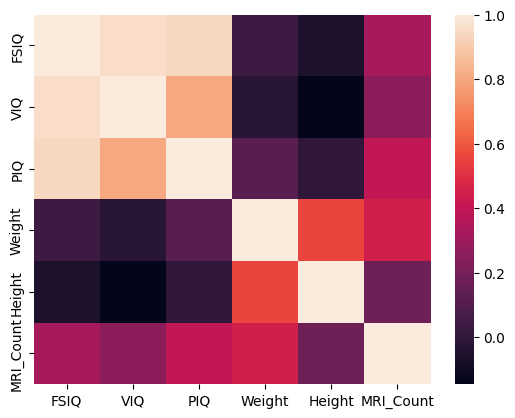

In [ ]:
# Code cell 12
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)


**Remarks**: Seeing the heatmap above, we can quickly tell that if the color is lighter, there is a more positive correlation between the two attributes. On the other hand, darker colors indicate weaker correlation between the attributes. For example, we can see a strong positive relationsip between the **VIQ** and **PSIQ** variables.

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-15-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

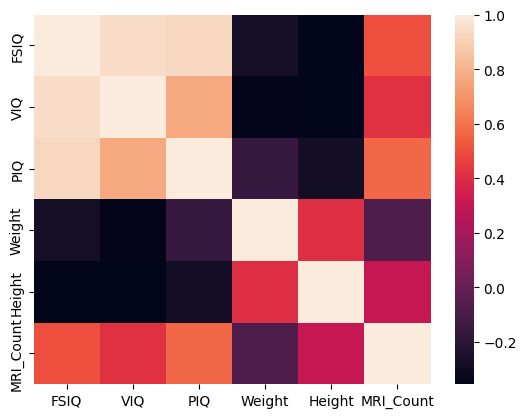

In [ ]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

*Many variable pairs present correlation close to zero. What does that mean?*

This simply indicates that there is a ***weak correlation*** between those pairs.


<br> *Why separate the genders?*

Separating the genders is crucial as there are variables like height and weight present in the data. There is a distinction of these variables when it comes to gender, for instance, males tend to be taller and heavier than females. This avoids us skewing the data or producing very unexpected results.


<br> *What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.*

For the female population, the **weight** variable shows stronger relationship with the brain size. While for the male population, the three IQs, **PIQ**, **FSIQ**, and **VIQ** show the strongest relationship with brain size. These are somehow expected, as heavier people can be bigger, hence, their brain size may have the tendency to be bigger as well. It also makes sense for people who have high IQ levels to have bigger brains.


### Supplementary Activity

The dataset that is used for the supplementary activity came from Kaggle. This dataset contains scores from three tests: Math, Reading, and Writing, as well as some personal and socio-economic factors.

Source: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?resource=download

##### Loading the Dataset from a File.

In [ ]:
scoreFile = "/content/Expanded_data_with_more_features.csv"
scoreFrame = pd.read_csv(scoreFile)

##### Verifying the dataframe.

In [ ]:
scoreFrame.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,unknown,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### Scatterplot Graphs and Correlatable Variables

Using `describe()` method.

In [ ]:
scoreFrame.describe()


,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.035802,66.558402,69.377533,68.418622
std,1.497166,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


**Remarks**: Upon using the `describe()` method, we can see that there are over 30,000 data in the dataset. Some other statistical information are also present such as the average of the number of siblings, scores in Math, Reading, and Writing.

##### Separating Data

Here, we will separate the data according to the gender, this way, we can have a comparison for both genders.

In [ ]:
maleDf = scoreFrame[(scoreFrame.Gender == 'male')]
femaleDf = scoreFrame[(scoreFrame.Gender == 'female')]

##### Plotting the Graphs

Here, we will try to see the relationship of the different test scores with each other through a scatterplot (e.g. relationship of Math and Reading Scores).

Experimented with showing multiple scatterplots in one code through the use of `plt.subplots()` for cleaner data look.

Reference:
[2] “How can I show figures separately?,” Stack Overflow. https://stackoverflow.com/questions/2397791/how-can-i-show-figures-separately (accessed Feb. 07, 2024).
‌

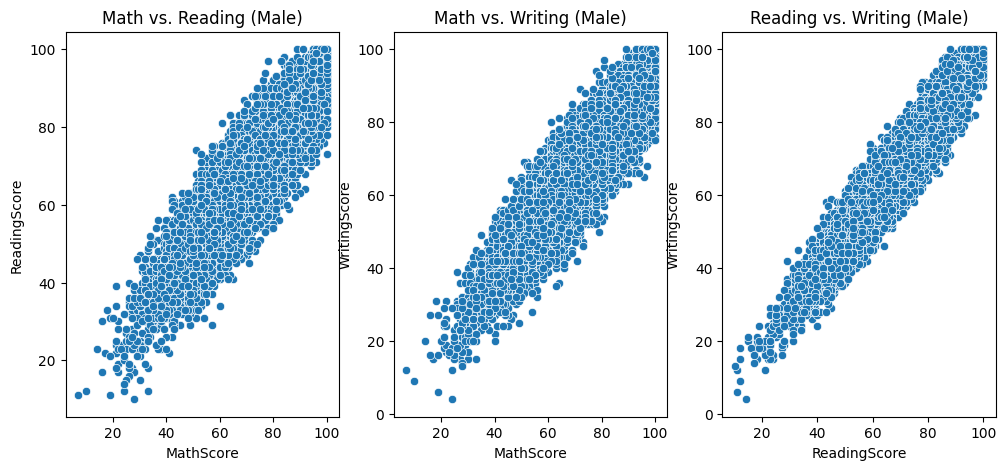

In [ ]:
# For male data only

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.scatterplot(maleDf, x='MathScore', y='ReadingScore', ax=axes[0])
axes[0].set_title("Math vs. Reading (Male)")

sns.scatterplot(maleDf, x='MathScore', y='WritingScore', ax=axes[1])
axes[1].set_title("Math vs. Writing (Male)")

sns.scatterplot(maleDf, x='ReadingScore', y='WritingScore', ax=axes[2])
axes[2].set_title("Reading vs. Writing (Male)")

plt.show()
%matplotlib inline

**Remarks**: From the scatterplots above, we can see a positive correlation between the attributes that we tested against each other. Meaning, if the student scores high in his Math exam, his Reading and Writing scores may be high as well. Same goes with the boys, reading and writing scores as well.

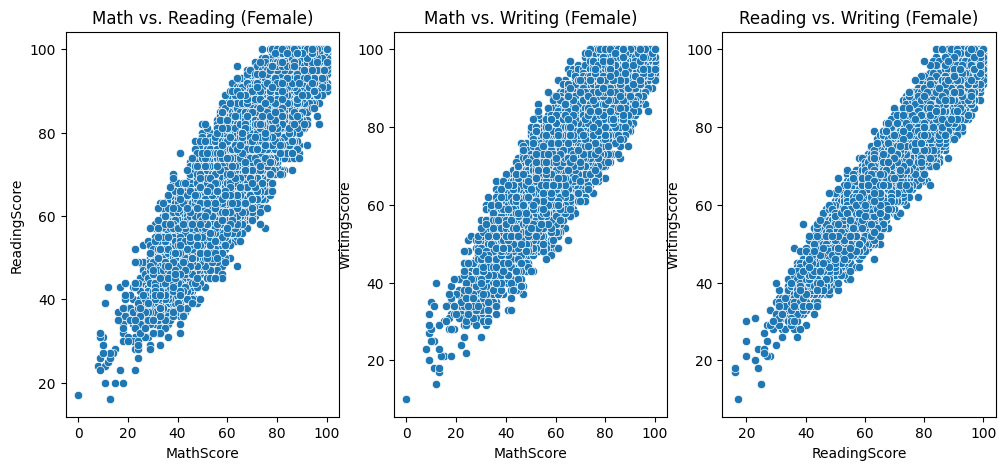

In [ ]:
# For female data only

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.scatterplot(femaleDf, x='MathScore', y='ReadingScore', ax=axes[0])
axes[0].set_title("Math vs. Reading (Female)")

sns.scatterplot(femaleDf, x='MathScore', y='WritingScore', ax=axes[1])
axes[1].set_title("Math vs. Writing (Female)")

sns.scatterplot(femaleDf, x='ReadingScore', y='WritingScore', ax=axes[2])
axes[2].set_title("Reading vs. Writing (Female)")

plt.show()
%matplotlib inline

**Remarks**: The same trend is seen in the girls' dataset.

##### Showing the exam performance depending on gender.

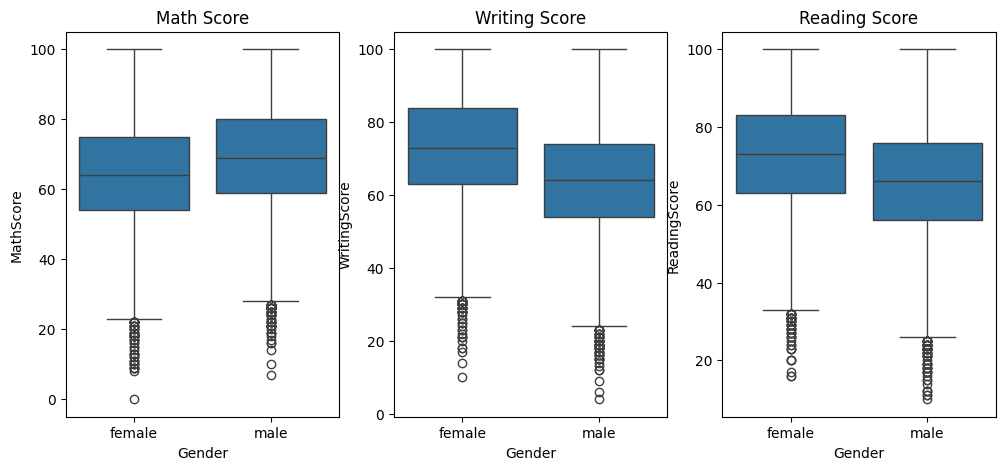

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot 1: MathScore Distribution
sns.boxplot(data=scoreFrame, x='Gender', y='MathScore', ax=axes[0])
axes[0].set_title('Math Score')

# Plot 2: ReadingScore Distribution
sns.boxplot(data=scoreFrame, x='Gender', y='WritingScore', ax=axes[1])
axes[1].set_title('Writing Score')

# Plot 2: WritingScore Distribution
sns.boxplot(data=scoreFrame, x='Gender', y='ReadingScore', ax=axes[2])
axes[2].set_title('Reading Score')

# Display the plots
plt.show()

Here, we tested a box plot to show how the students perform in certain exams depending on their genders. As we can see, in Math, the male population seems to perform better. While the females perform better in Reading and Writing.

##### Calculating Correlation

In [ ]:
scoreFrame.corr(method='pearson')

<ipython-input-49-697898e2166c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  scoreFrame.corr(method='pearson')


,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,-0.000008,-0.000039,-0.000799
MathScore,-0.000008,1.000000,0.817825,0.807118
ReadingScore,-0.000039,0.817825,1.000000,0.952584
WritingScore,-0.000799,0.807118,0.952584,1.000000


**Remarks**: From the results above, we can confirm that there really is a positive correlation between the students' scores in Math and Reading, Math and Writing, as well as Reading and Writing.

##### Visualizing

Plotting the correlation heatmap.

<ipython-input-50-7a0a6d622dd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  femaleCorr = femaleDf.corr()


<Axes: >

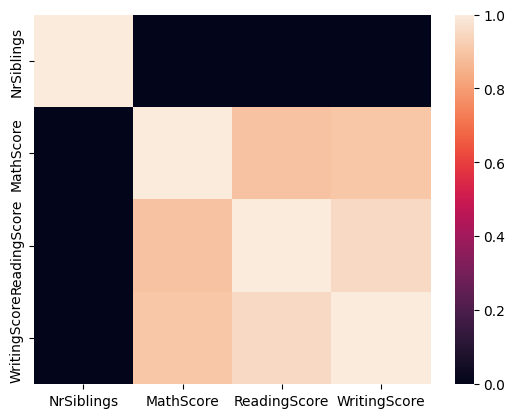

In [ ]:
femaleCorr = femaleDf.corr()
sns.heatmap(femaleCorr)

<ipython-input-51-175bac1169fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maleCorr = maleDf.corr()


<Axes: >

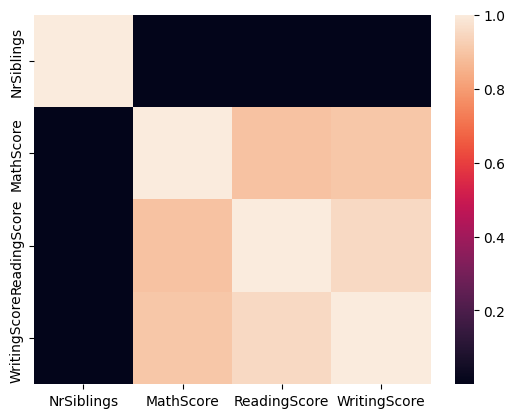

In [ ]:
maleCorr = maleDf.corr()
sns.heatmap(maleCorr)

**Remarks**: From both of the heatmaps above, it can be observed that no correlation was found between the attributes and the number of siblings. This tells us that the student's number of siblings do not relate with his/her exam scores in Math, Reading, and Writing.

On the other hand, strong positive correlation is observed between the exam scores. This is indicative that the score in one subject is positively correlated to the other one. If one scores high in Math, his/her scores in Reading and Writing may be high as well.

#### Conclusion

This experiment allows us to explore the different ways to access and read data, as well as process them through statistical means. The syntax for each of the library may seem a lot at first but they proved to be very useful in helping us consume data more easily.

In  the future, I wish to explore additional ways to present the data that is appropriate for the type of data I am handling.